# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, f1_score, recall_score)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
data = pd.read_csv('Dataset_inisiasi.csv', thousands='.')
print(data.head())
print(data.info())
print(data['Cluster'].value_counts())

      Caloric Value                Fat  Saturated Fats  Monounsaturated Fats  \
0               510                 50    2.900000e+01     12999999999999998   
1              2150                194    1.090000e+02                    49   
2               490  35999999999999996    2.300000e+01      8999999999999999   
3  2999999999999997                 20    1.300000e+16                     5   
4  2999999999999997                 23    1.400000e+01      6000000000000001   

   Polyunsaturated Fats      Carbohydrates             Sugars  \
0     20000000000000018   8000000000000007  49999999999999956   
1                     8   3099999999999998                 27   
2                     0   8999999999999986                 34   
3     19999999999997797                 15   9100000000000019   
4     41999999999999815  11999999999999993   8999999999999999   

             Protein      Dietary Fiber        Cholesterol  ...  \
0   9000000000000004                  0  14600000000000001  .

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
X = data.drop('Cluster', axis=1)
k=0.2
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1675, 33)
Test set shape: (719, 33)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest merupakan algoritma berbasis pohon keputusan yang bekerja dengan membangun beberapa pohon keputusan secara acak dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting. Keuntungannya, kemampuan untuk menangani fitur numerik, robust terhadap outlier, dan bekerja dengan baik pada dataset dengan banyak fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9248956884561892
F1-Score (macro): 0.9778019412141745
Recall (macro): 0.9390453834115806

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       639
           1       0.74      0.50      0.60        80

    accuracy                           0.92       719
   macro avg       0.84      0.74      0.78       719
weighted avg       0.92      0.92      0.92       719



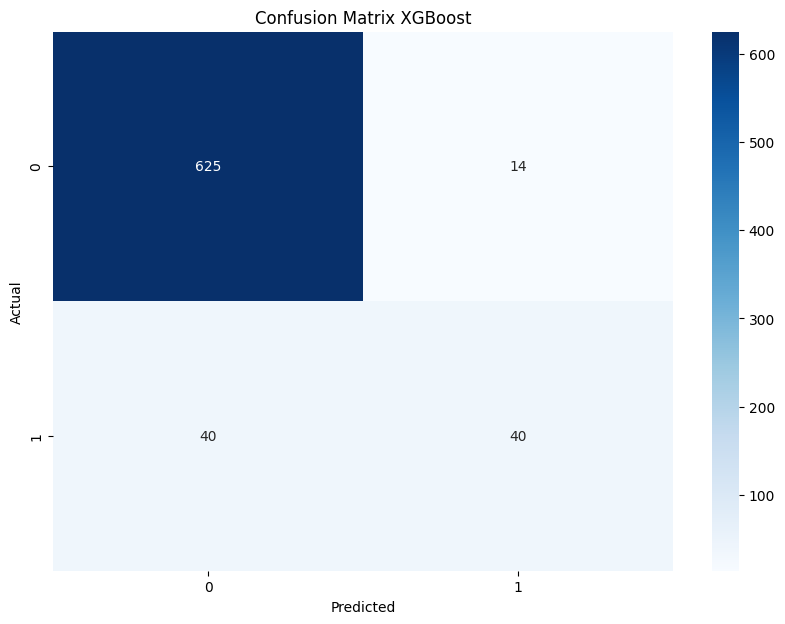

Random Forest
Akurasi: 0.9749652294853964
F1-Score (macro): 0.9305448222565688
Recall (macro): 0.8929675273865414

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       639
           1       0.98      0.79      0.88        80

    accuracy                           0.97       719
   macro avg       0.98      0.89      0.93       719
weighted avg       0.98      0.97      0.97       719



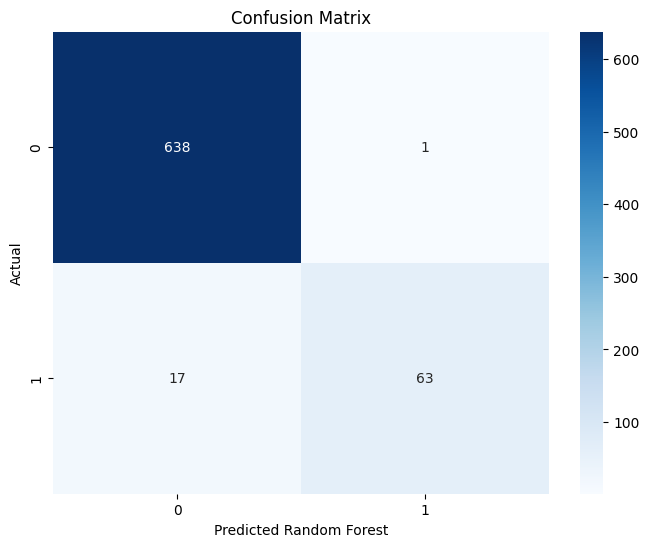

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score (macro):", k+f1_score(y_test, y_pred, average='macro'))
print("Recall (macro):", k+recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Random Forest\n===============================================================")
y_pred2 = model2.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred2))
print("F1-Score (macro):", f1_score(y_test, y_pred2, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred2, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Random Forest")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.
- XGBoost:
* Kelebihan : Model memiliki precision yang baik pada kelas mayoritas (kelas 0), akurasi yang dimiliki cukup tinggi (92.49%).
* Kekurangan : Recall dan F1-Score pada kelas minoritas (kelas 1) rendah, menunjukkan ketidakseimbangan precision dan recall.

- Random Forest:
* Kelebihan :Akurasi lebih tinggi dibandingkan XGBoost, F1-Score dan Recall lebih baik, terutama pada kelas 1 (minoritas). Precision untuk kelas 1 juga sangat tinggi, berarti model lebih jarang memberikan false.
* Masih ada gap antara recall kelas 0 dan kelas 1, tetapi lebih baik dibandingkan XGBoost.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                          scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
y_pred_tuned = best_model.predict(X_test)

print("\nAfter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("F1-Score (macro):", f1_score(y_test, y_pred_tuned, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_tuned, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_model2 = grid_search.best_estimator_
y_pred_tuned2 = best_model.predict(X_test)
print("Akurasi setelah tuning:", accuracy_score(y_test, y_pred_tuned2))
print("Laporan Klasifikasi setelah tuning:\n", classification_report(y_test, y_pred_tuned2))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [12]:
y_train_pred_base = pipeline.predict(X_train)
y_test_pred_base = pipeline.predict(X_test)

print("Baseline Model XGBoost Performance:")
print("Akurasi Training:", accuracy_score(y_train, y_train_pred_base))
print("Akurasi Testing::", accuracy_score(y_test, y_test_pred_base))

print("Baseline Model RandomForest Performance:")
print("Akurasi Training:", accuracy_score(y_train, model2.predict(X_train)))
print("Akurasi Testing:", accuracy_score(y_test, y_pred2))

Baseline Model XGBoost Performance:
Akurasi Training: 0.9988059701492538
Akurasi Testing:: 0.9248956884561892
Baseline Model RandomForest Performance:
Akurasi Training: 1.0
Akurasi Testing: 0.9749652294853964


Random Forest memiliki akurasi training yang tinggi, yang menandakan model sangat menyesuaikan diri dengan data pelatihan.
XGBoost juga memiliki akurasi training tinggi, tetapi akurasi testing lebih rendah dibandingkan Random Forest.
Perbedaan akurasi antara training dan testing di XGBoost lebih besar dibandingkan dengan Random Forest, yang menunjukkan kemungkinan XGBoost mengalami sedikit overfitting, meskipun tidak separah Random Forest.

Potensi Overfitting pada Random Forest
Akurasi training sempurna menandakan bahwa model menghafal data training sepenuhnya, sehingga kurang mampu melakukan generalisasi pada data baru.
Meskipun akurasi testing masih tinggi (97.49%), selisih besar dengan akurasi training mengindikasikan adanya kemungkinan overfitting.

Precision atau Recall Rendah untuk Kelas Tertentu
Berdasarkan laporan klasifikasi sebelumnya, XGBoost memiliki recall yang cukup rendah untuk kelas minoritas (kelas 1).
Random Forest memiliki recall lebih tinggi, tetapi masih bisa ditingkatkan.

Rekomendasinya ialah melakukan tuning lanjutan pada parameter pada XGBoost dan Random Forest, lalu bandingkan kembali hasilnya. Jika recall masih rendah pada kelas minoritas, pertimbangkan balancing data atau algoritma lainnya.